In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from absbox import API,EnginePath

localAPI = API(EnginePath.DEV, lang='english',check=False)

import absbox.examples as examples

Connecting engine server -> http://localhost:8081

✅Connected, local lib:0.26.4, server:0.27.7

### View Multiple cashflow

User can have view multiple cashflows via single function

In [3]:
r = localAPI.run(examples.test03
               ,poolAssump = ("Pool",("Mortgage",None,None,None,None)
                                       ,None
                                       ,None)
               ,runAssump = None
               ,read=True)

#### View multiple bonds casfhlow

include cashflow view function

In [4]:
from absbox import readBondsCf,readFeesCf,readAccsCf

In [5]:
readBondsCf(r['bonds'])

Bond            A1                                         B           \
Field      balance interest principal  rate    cash  balance interest   
date                                                                    
2021-06-20  383.31    12.27    416.69  0.07  428.96  1000.00     0.00   
2021-07-20  296.39     2.20     86.92  0.07   89.12  1000.00     0.00   
2021-08-20  207.31     1.76     89.08  0.07   90.84  1000.00     0.00   
2021-09-20  115.86     1.23     91.45  0.07   92.68  1000.00     0.00   
2021-10-20   21.86     0.66     94.00  0.07   94.66  1000.00     0.00   
2021-11-20    0.00     0.12     21.86  0.07   21.98   925.44     0.00   
2021-12-20     NaN      NaN       NaN   NaN     NaN   826.84     0.00   
2022-01-20     NaN      NaN       NaN   NaN     NaN   726.25     0.00   
2022-02-20     NaN      NaN       NaN   NaN     NaN   623.59     0.00   
2022-03-20     NaN      NaN       NaN   NaN     NaN   518.65     0.00   
2022-04-20     NaN      NaN       NaN   NaN     NaN   411.68     0.00   
2022-05-20     NaN      NaN       NaN   NaN     NaN   302.47     0.00   
2022-06-20     NaN      NaN       NaN   NaN     NaN   191.02     0.00   
2022-07-20     NaN      NaN       NaN   NaN     NaN    77.25     0.00   
2022-08-20     NaN      NaN       NaN   NaN     NaN     0.00    38.85   
2022-09-20     NaN      NaN       NaN   NaN     NaN     0.00   117.70   
2022-10-20     NaN      NaN       NaN   NaN     NaN     0.00   117.79   

Bond                               
Field      principal rate    cash  
date                               
2021-06-20      0.00    0    0.00  
2021-07-20      0.00    0    0.00  
2021-08-20      0.00    0    0.00  
2021-09-20      0.00    0    0.00  
2021-10-20      0.00    0    0.00  
2021-11-20     74.56    0   74.56  
2021-12-20     98.60    0   98.60  
2022-01-20    100.59    0  100.59  
2022-02-20    102.66    0  102.66  
2022-03-20    104.94    0  104.94  
2022-04-20    106.97    0  106.97  
2022-05-20    109.21    0  109.21  
2022-06-20    111.45    0  111.45  
2022-07-20    113.77    0  113.77  
2022-08-20     77.25    0  116.10  
2022-09-20      0.00    0  117.70  
2022-10-20      0.00    0  117.79

In [20]:
t = readBondsCf(r['bonds'])

In [25]:
t.columns

MultiIndex([('A1',   'balance'),
            ('A1',  'interest'),
            ('A1', 'principal'),
            ('A1',      'rate'),
            ('A1',      'cash'),
            ( 'B',   'balance'),
            ( 'B',  'interest'),
            ( 'B', 'principal'),
            ( 'B',      'rate'),
            ( 'B',      'cash')],
           names=['Bond', 'Field'])

In [34]:
tt = t.loc[:, t.columns.get_level_values(1) == 'balance']
tt

Bond,A1,B
Field,balance,balance
date,,
2021-06-20,383.31,1000.00
2021-07-20,296.39,1000.00
2021-08-20,207.31,1000.00
2021-09-20,115.86,1000.00
2021-10-20,21.86,1000.00
2021-11-20,0.00,925.44
2021-12-20,NaN,826.84
2022-01-20,NaN,726.25


In [62]:
tt.index

Index(['2021-06-20', '2021-07-20', '2021-08-20', '2021-09-20', '2021-10-20',
       '2021-11-20', '2021-12-20', '2022-01-20', '2022-02-20', '2022-03-20',
       '2022-04-20', '2022-05-20', '2022-06-20', '2022-07-20', '2022-08-20',
       '2022-09-20', '2022-10-20'],
      dtype='object', name='date')

In [65]:
import pandas as pd

In [66]:
tt.index = pd.to_datetime(tt.index)

In [92]:
len(tt.index)

17

In [39]:
np.vstack(tt.T.values)

array([[ 383.31,  296.39,  207.31,  115.86,   21.86,    0.  ,     nan,
            nan,     nan,     nan,     nan,     nan,     nan,     nan,
            nan,     nan,     nan],
       [1000.  , 1000.  , 1000.  , 1000.  , 1000.  ,  925.44,  826.84,
         726.25,  623.59,  518.65,  411.68,  302.47,  191.02,   77.25,
           0.  ,    0.  ,    0.  ]])

In [54]:
np.nanmax(tt.T.values)

1000.0

In [123]:
import matplotlib.pyplot as plt
import numpy as np

def plotBonds(bndMaps:dict):
    
    bondFlows = readBondsCf(bndMaps)
    
    plt.style.use('_mpl-gallery')
    
    # dates as x
    x = bondFlows.index.to_list()
    
    # bond balances
    bondBalance = bondFlows.loc[:, bondFlows.columns.get_level_values(1) == 'balance']

    
    #ay = [1, 1.25, 2, 2.75, 3]
    #by = [1, 1, 1, 1, 1]
    #cy = [2, 1, 2, 1, 2]
    y = np.vstack(bondBalance.T.values)
    print(bondBalance.T.values)

    # plot
    fig, ax = plt.subplots()

    ax.stackplot(x, y)
    ax.set(xticks=bondBalance.index.to_list(),
          yticks=np.arange(1, np.nanmax(bondBalance.T.values)*1.3, step=100),
          )
    plt.xticks(rotation=45)

    plt.show()

[[ 383.31  296.39  207.31  115.86   21.86    0.       nan     nan     nan
      nan     nan     nan     nan     nan     nan     nan     nan]
 [1000.   1000.   1000.   1000.   1000.    925.44  826.84  726.25  623.59
   518.65  411.68  302.47  191.02   77.25    0.      0.      0.  ]]


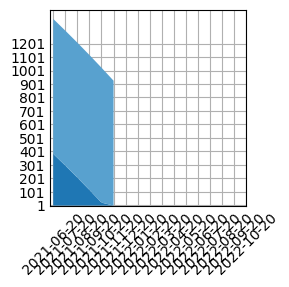

In [124]:
plotBonds(r['bonds'])

In [11]:
readBondsCf(r['bonds'],popColumns=[])

Bond            A1                                            \
Field      balance interest principal  rate    cash   factor   
date                                                           
2021-06-20  383.31    12.27    416.69  0.07  428.96  0.38331   
2021-07-20  296.39     2.20     86.92  0.07   89.12  0.29639   
2021-08-20  207.31     1.76     89.08  0.07   90.84  0.20731   
2021-09-20  115.86     1.23     91.45  0.07   92.68  0.11586   
2021-10-20   21.86     0.66     94.00  0.07   94.66  0.02186   
2021-11-20    0.00     0.12     21.86  0.07   21.98  0.00000   
2021-12-20     NaN      NaN       NaN   NaN     NaN      NaN   
2022-01-20     NaN      NaN       NaN   NaN     NaN      NaN   
2022-02-20     NaN      NaN       NaN   NaN     NaN      NaN   
2022-03-20     NaN      NaN       NaN   NaN     NaN      NaN   
2022-04-20     NaN      NaN       NaN   NaN     NaN      NaN   
2022-05-20     NaN      NaN       NaN   NaN     NaN      NaN   
2022-06-20     NaN      NaN       NaN   NaN     NaN      NaN   
2022-07-20     NaN      NaN       NaN   NaN     NaN      NaN   
2022-08-20     NaN      NaN       NaN   NaN     NaN      NaN   
2022-09-20     NaN      NaN       NaN   NaN     NaN      NaN   
2022-10-20     NaN      NaN       NaN   NaN     NaN      NaN   

Bond                                           B                          \
Field                              memo  balance interest principal rate   
date                                                                       
2021-06-20  [<PayInt:A1>, <PayPrin:A1>]  1000.00     0.00      0.00    0   
2021-07-20  [<PayInt:A1>, <PayPrin:A1>]  1000.00     0.00      0.00    0   
2021-08-20  [<PayInt:A1>, <PayPrin:A1>]  1000.00     0.00      0.00    0   
2021-09-20  [<PayInt:A1>, <PayPrin:A1>]  1000.00     0.00      0.00    0   
2021-10-20  [<PayInt:A1>, <PayPrin:A1>]  1000.00     0.00      0.00    0   
2021-11-20  [<PayInt:A1>, <PayPrin:A1>]   925.44     0.00     74.56    0   
2021-12-20                          NaN   826.84     0.00     98.60    0   
2022-01-20                          NaN   726.25     0.00    100.59    0   
2022-02-20                          NaN   623.59     0.00    102.66    0   
2022-03-20                          NaN   518.65     0.00    104.94    0   
2022-04-20                          NaN   411.68     0.00    106.97    0   
2022-05-20                          NaN   302.47     0.00    109.21    0   
2022-06-20                          NaN   191.02     0.00    111.45    0   
2022-07-20                          NaN    77.25     0.00    113.77    0   
2022-08-20                          NaN     0.00    38.85     77.25    0   
2022-09-20                          NaN     0.00   117.70      0.00    0   
2022-10-20                          NaN     0.00   117.79      0.00    0   

Bond                                                      
Field         cash   factor                         memo  
date                                                      
2021-06-20    0.00  1.00000  [<PayPrin:B>, <PayYield:B>]  
2021-07-20    0.00  1.00000  [<PayPrin:B>, <PayYield:B>]  
2021-08-20    0.00  1.00000  [<PayPrin:B>, <PayYield:B>]  
2021-09-20    0.00  1.00000  [<PayPrin:B>, <PayYield:B>]  
2021-10-20    0.00  1.00000  [<PayPrin:B>, <PayYield:B>]  
2021-11-20   74.56  0.92544  [<PayPrin:B>, <PayYield:B>]  
2021-12-20   98.60  0.82684  [<PayPrin:B>, <PayYield:B>]  
2022-01-20  100.59  0.72625  [<PayPrin:B>, <PayYield:B>]  
2022-02-20  102.66  0.62359  [<PayPrin:B>, <PayYield:B>]  
2022-03-20  104.94  0.51865  [<PayPrin:B>, <PayYield:B>]  
2022-04-20  106.97  0.41168  [<PayPrin:B>, <PayYield:B>]  
2022-05-20  109.21  0.30247  [<PayPrin:B>, <PayYield:B>]  
2022-06-20  111.45  0.19102  [<PayPrin:B>, <PayYield:B>]  
2022-07-20  113.77  0.07725  [<PayPrin:B>, <PayYield:B>]  
2022-08-20  116.10  0.00000  [<PayPrin:B>, <PayYield:B>]  
2022-09-20  117.70  0.00000                 <PayYield:B>  
2022-10-20  117.79  0.00000                 <PayYield:B>

#### View multiple fee cashflow

In [6]:
readFeesCf(r['fees'])

Fee        bondAdmFee         poolServFee        
Field         balance payment     balance payment
date                                             
2021-06-20          0   36.00           0    6.48
2021-07-20          0   27.66           0    1.07
2021-08-20          0   25.92           0    1.10
2021-09-20          0   24.14           0    1.03
2021-10-20          0   22.31           0    0.88
2021-11-20          0   20.43           0    0.89
2021-12-20          0   18.50           0    0.75
2022-01-20          0   16.53           0    0.74
2022-02-20          0   14.52           0    0.67
2022-03-20          0   12.47           0    0.45
2022-04-20          0   10.37           0    0.52
2022-05-20          0    8.23           0    0.41
2022-06-20          0    6.04           0    0.37
2022-07-20          0    3.82           0    0.27
2022-08-20          0    1.54           0    0.22
2022-09-20          0    0.00           0    0.15
2022-10-20          0    0.00           0    0.07

#### View multiple account cashflow

In [10]:
readAccsCf(r['accounts'])

Account      acc01        
Field      balance  change
date                      
2021-04-01    0.00    0.00
2021-04-01    0.00    0.00
2021-04-01  207.09  207.09
2021-04-01  235.72   28.63
2021-05-01  235.72    0.00
...            ...     ...
2022-10-20  117.79   -0.07
2022-10-20  117.79    0.00
2022-10-20  117.79    0.00
2022-10-20  117.79    0.00
2022-10-20    0.00 -117.79

[161 rows x 2 columns]